# Task 0a - Quality Control
This notebook does quality control on the adata. This is the first step.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os import listdir
from os.path import isfile, join

In [2]:
# Set up data loading

####################

# GA_filtered_feature_bc_matrix.h5ad
# GA_filtered_feature_bc_matrix_symbols.h5ad
# raw_feature_bc_matrix.h5ad
# raw_feature_bc_matrix_symbols.h5ad

####################

path1_matrix = '/lustre/groups/ml01/projects/2023_pancreatic_cancer_rev_till.richter/cr_rev21/scanpy_AnnData/1_9591_TEBBO/1_9591_TEBBO_filtered_feature_bc_matrix.h5ad'
path2_matrix = '/lustre/groups/ml01/projects/2023_pancreatic_cancer_rev_till.richter/cr_rev21/scanpy_AnnData/2_9591_cystic_branched/2_9591_cystic_branched_filtered_feature_bc_matrix.h5ad'
path3_matrix = '/lustre/groups/ml01/projects/2023_pancreatic_cancer_rev_till.richter/cr_rev21/scanpy_AnnData/3_thick_branched/3_thick_branched_filtered_feature_bc_matrix.h5ad'
path4_matrix = '/lustre/groups/ml01/projects/2023_pancreatic_cancer_rev_till.richter/cr_rev21/scanpy_AnnData/4_tree-like/4_tree-like_filtered_feature_bc_matrix.h5ad'
path5_matrix = '/lustre/groups/ml01/projects/2023_pancreatic_cancer_rev_till.richter/cr_rev21/scanpy_AnnData/5_branched_mesenchymal/5_branched_mesenchymal_filtered_feature_bc_matrix.h5ad'
path6_matrix = '/lustre/groups/ml01/projects/2023_pancreatic_cancer_rev_till.richter/cr_rev21/scanpy_AnnData/6_firework/6_firework_filtered_feature_bc_matrix.h5ad'
path7_matrix = '/lustre/groups/ml01/projects/2023_pancreatic_cancer_rev_till.richter/cr_rev21/scanpy_AnnData/7_star-like/7_star-like_filtered_feature_bc_matrix.h5ad'


adata_m1 = sc.read(path1_matrix)
adata_m2 = sc.read(path2_matrix)
adata_m3 = sc.read(path3_matrix)
adata_m4 = sc.read(path4_matrix)
adata_m5 = sc.read(path5_matrix)
adata_m6 = sc.read(path6_matrix)
adata_m7 = sc.read(path7_matrix)

In [3]:
c_name1 = list(adata_m1.obs.index)
c_name2 = list(adata_m2.obs.index)
c_name3 = list(adata_m3.obs.index)
c_name4 = list(adata_m4.obs.index)
c_name5 = list(adata_m5.obs.index)
c_name6 = list(adata_m6.obs.index)
c_name7 = list(adata_m7.obs.index)

In [4]:
# Annotate adatas
# add sample
samples = pd.Series(["1_9591_TEBBO", "2_9591_cystic_branched", "3_thick_branched", "4_tree-like", "5_branched_mesenchymal", "6_firework", "7_star-like"], dtype="category")
adata_m1.obs['sample_id'] = samples[0]
adata_m2.obs['sample_id'] = samples[1]
adata_m3.obs['sample_id'] = samples[2]
adata_m4.obs['sample_id'] = samples[3]
adata_m5.obs['sample_id'] = samples[4]
adata_m6.obs['sample_id'] = samples[5]
adata_m7.obs['sample_id'] = samples[6]

adata_m1.obs['sample_nr'] = 1
adata_m2.obs['sample_nr'] = 2
adata_m3.obs['sample_nr'] = 3
adata_m4.obs['sample_nr'] = 4
adata_m5.obs['sample_nr'] = 5
adata_m6.obs['sample_nr'] = 6
adata_m7.obs['sample_nr'] = 7

# add donor (not sure if needed, all mouse)
adata_m1.obs['donor'] = 'mouse'
adata_m2.obs['donor'] = 'mouse'
adata_m3.obs['donor'] = 'mouse'
adata_m4.obs['donor'] = 'mouse'
adata_m5.obs['donor'] = 'mouse'
adata_m6.obs['donor'] = 'mouse'
adata_m7.obs['donor'] = 'mouse'

print('Samples {} Shape {}'.format(samples[0], adata_m1.shape))
print('Samples {} Shape {}'.format(samples[1], adata_m2.shape))
print('Samples {} Shape {}'.format(samples[2], adata_m3.shape))
print('Samples {} Shape {}'.format(samples[3], adata_m4.shape))
print('Samples {} Shape {}'.format(samples[4], adata_m5.shape))
print('Samples {} Shape {}'.format(samples[5], adata_m6.shape))
print('Samples {} Shape {}'.format(samples[6], adata_m7.shape))

Samples 1_9591_TEBBO Shape (6942, 22545)
Samples 2_9591_cystic_branched Shape (20746, 22545)
Samples 3_thick_branched Shape (7044, 22545)
Samples 4_tree-like Shape (2763, 22545)
Samples 5_branched_mesenchymal Shape (1823, 22545)
Samples 6_firework Shape (8226, 22545)
Samples 7_star-like Shape (6251, 22545)


## Quality control and plots

# a) Sample 1_9591_TEBBO

In [5]:
# Quality control - calculate QC covariates
adata_m1.var["mt"] = adata_m1.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m1, qc_vars=["mt"], inplace=True)

adata_m1.obs['log_counts'] = np.log(adata_m1.obs['total_counts'])

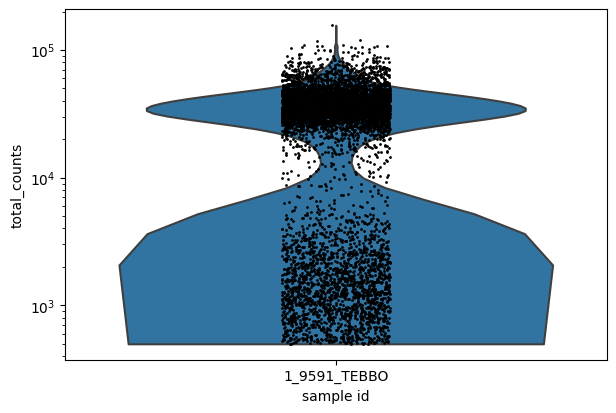

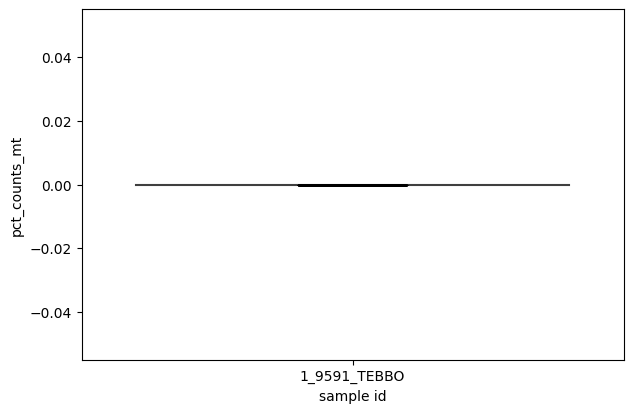

In [6]:
# Quality control - plot QC metrics
m1_t1 = sc.pl.violin(adata_m1, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m1_t2 = sc.pl.violin(adata_m1, 'pct_counts_mt', groupby='sample_id')

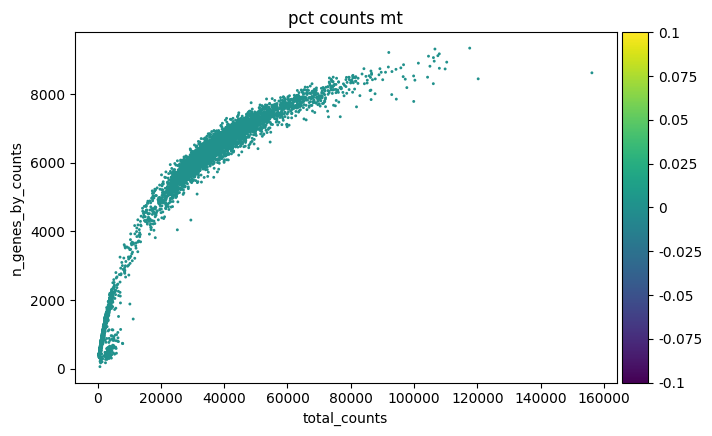

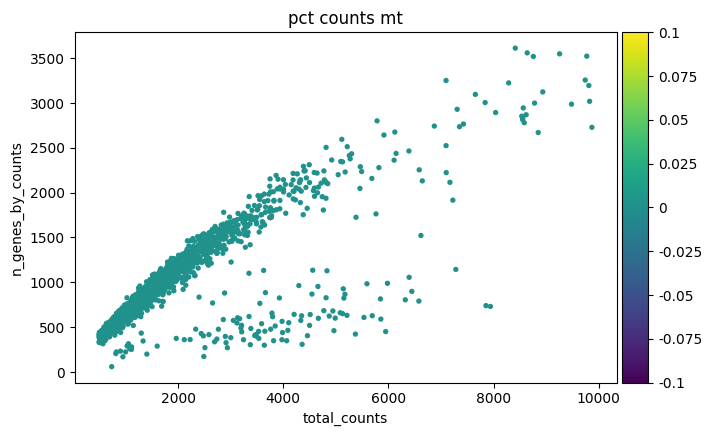

In [7]:
# Data quality summary plots
m1_p1 = sc.pl.scatter(adata_m1, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m1_p2 = sc.pl.scatter(adata_m1[adata_m1.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

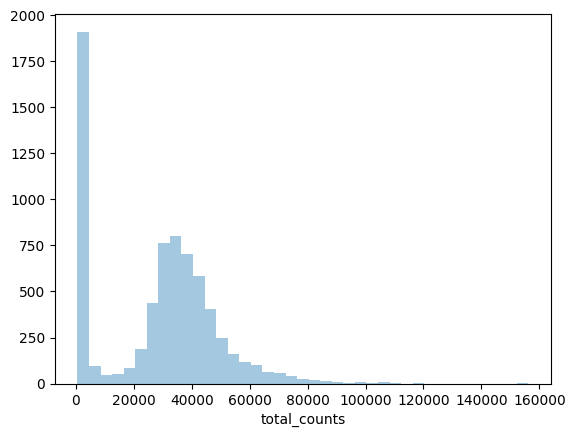

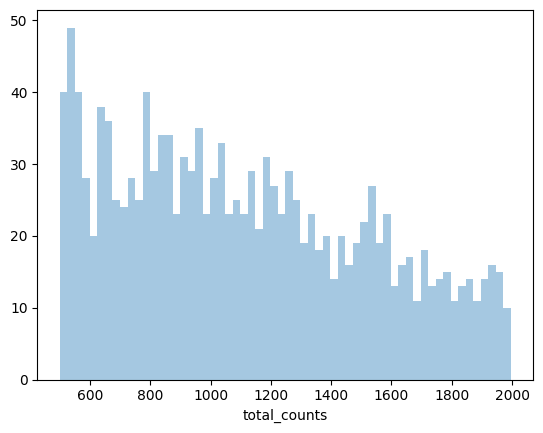

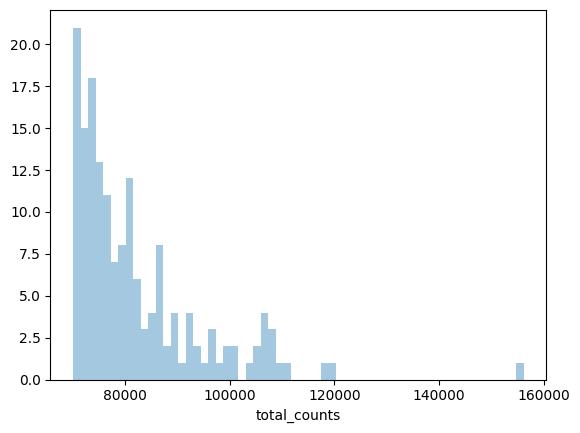

In [8]:
# Thresholding decision: counts
m1_p3 = sb.distplot(adata_m1.obs['total_counts'], kde=False)
plt.show()

m1_p4 = sb.distplot(adata_m1.obs['total_counts'][adata_m1.obs['total_counts']<2000], kde=False, bins=60)
plt.show()

m1_p5 = sb.distplot(adata_m1.obs['total_counts'][adata_m1.obs['total_counts']>70000], kde=False, bins=60)
plt.show()

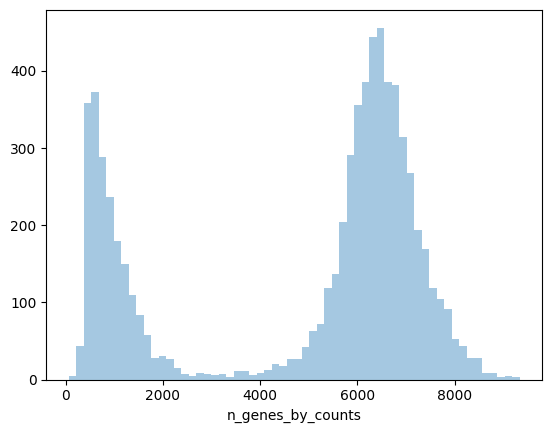

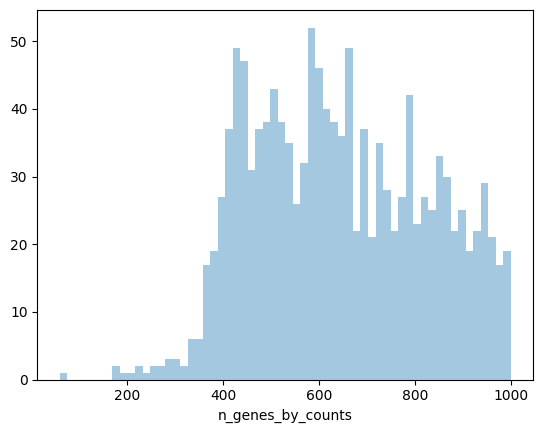

In [9]:
# Thresholding decision: genes
m1_p6 = sb.distplot(adata_m1.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m1_p7 = sb.distplot(adata_m1.obs['n_genes_by_counts'][adata_m1.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()


In [10]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m1.n_obs))

sc.pp.filter_cells(adata_m1, max_counts = 80000)
print('Number of cells after max count filter: {:d}'.format(adata_m1.n_obs))

adata_m1 = adata_m1[adata_m1.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m1.n_obs))

sc.pp.filter_cells(adata_m1, min_genes = 180)
print('Number of cells after gene filter: {:d}'.format(adata_m1.n_obs))

Total number of cells: 6942
Number of cells after max count filter: 6871
Number of cells after MT filter: 6871
Number of cells after gene filter: 6868


In [11]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m1, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m1.n_vars))

Total number of genes: 22545
Number of genes after cell filter: 14434


## cells with more than 80000 counts or less than 2000 counts
## cells with less than 180 expressed genes
## cells with 20% and more reads aligned to mitochondrial genes
## resulting dataset consists of 6776 cells and 14395 genes

# b) Sample 2_9591_cystic_branched

In [12]:
# Quality control - calculate QC covariates
adata_m2.var["mt"] = adata_m2.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m2, qc_vars=["mt"], inplace=True)

adata_m2.obs['log_counts'] = np.log(adata_m2.obs['total_counts'])

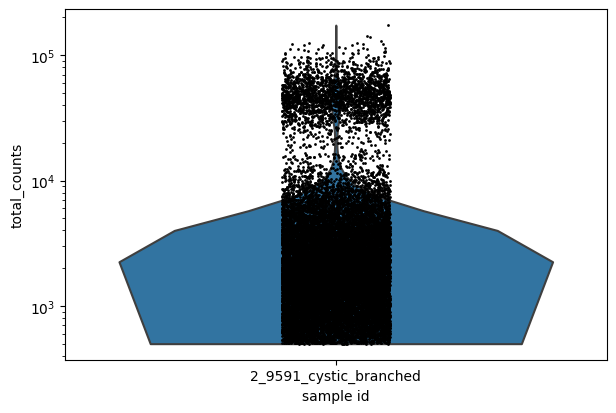

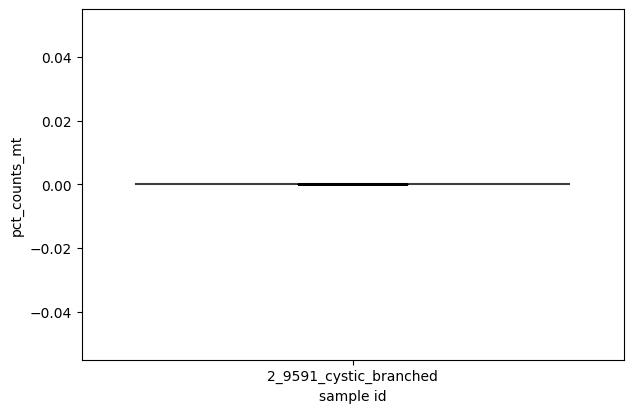

In [13]:
# Quality control - plot QC metrics
m2_t1 = sc.pl.violin(adata_m2, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m2_t2 = sc.pl.violin(adata_m2, 'pct_counts_mt', groupby='sample_id')

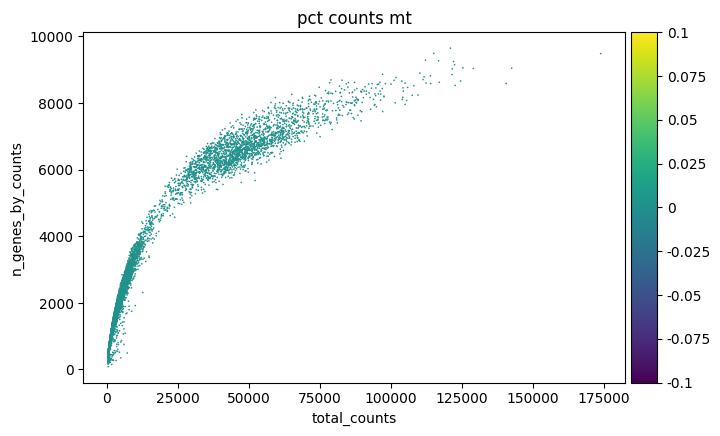

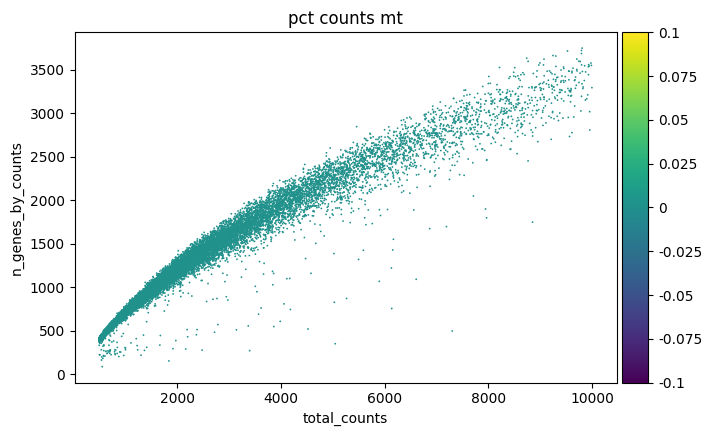

In [14]:
# Data quality summary plots
m2_p1 = sc.pl.scatter(adata_m2, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m2_p2 = sc.pl.scatter(adata_m2[adata_m2.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

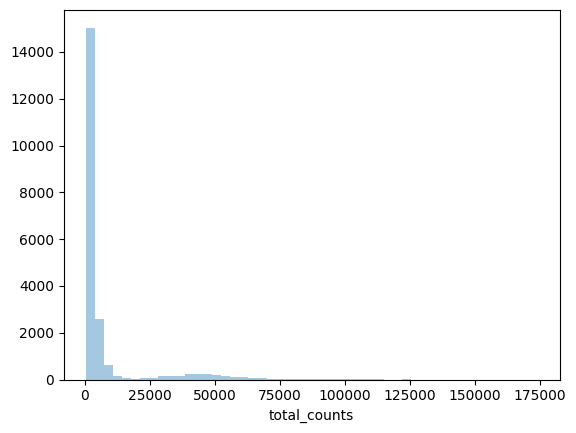

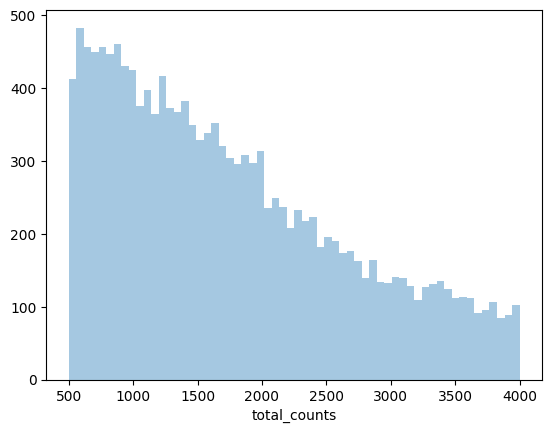

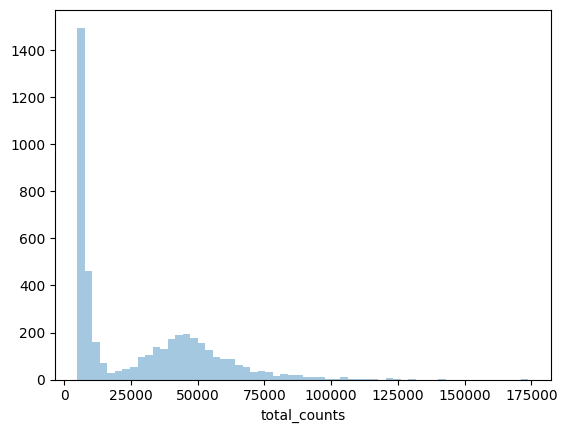

In [15]:
# Thresholding decision: counts
m2_p3 = sb.distplot(adata_m2.obs['total_counts'], kde=False)
plt.show()

m2_p4 = sb.distplot(adata_m2.obs['total_counts'][adata_m2.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

m2_p5 = sb.distplot(adata_m2.obs['total_counts'][adata_m2.obs['total_counts']>5000], kde=False, bins=60)
plt.show()

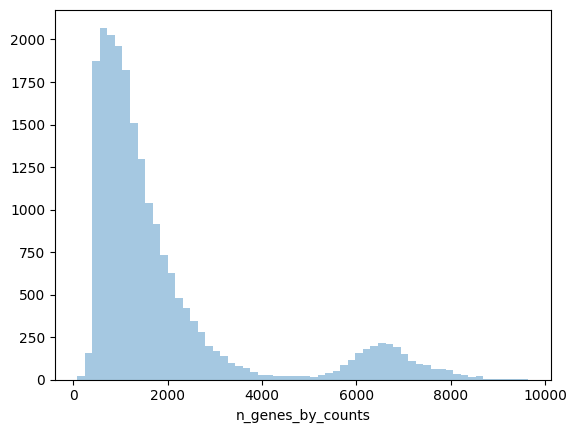

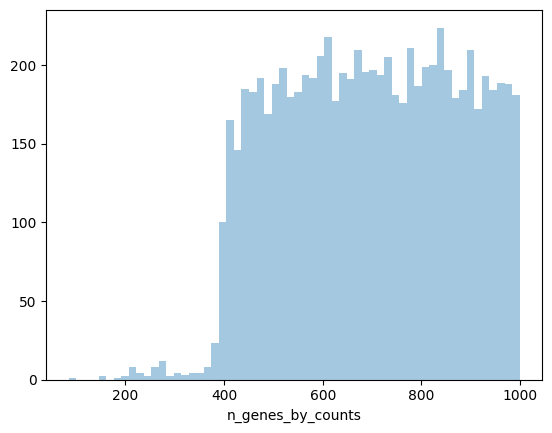

In [16]:
# Thresholding decision: genes
m2_p6 = sb.distplot(adata_m2.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m2_p7 = sb.distplot(adata_m2.obs['n_genes_by_counts'][adata_m2.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()


In [17]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m2.n_obs))

# sc.pp.filter_cells(adata_m2, min_counts = 0)  # wild assumption
# print('Number of cells after min count filter: {:d}'.format(adata_m2.n_obs))

sc.pp.filter_cells(adata_m2, max_counts = 20000)
print('Number of cells after max count filter: {:d}'.format(adata_m2.n_obs))

adata_m2 = adata_m2[adata_m2.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m2.n_obs))

sc.pp.filter_cells(adata_m2, min_genes = 350)
print('Number of cells after gene filter: {:d}'.format(adata_m2.n_obs))

Total number of cells: 20746
Number of cells after max count filter: 18506
Number of cells after MT filter: 18506
Number of cells after gene filter: 18452


In [18]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m2, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m2.n_vars))

Total number of genes: 22545
Number of genes after cell filter: 12996


## cells with more than 20000 counts
## cells with less than 350 expressed genes
## cells with 20% and more reads aligned to mitochondrial genes
## resulting dataset consists of 18452 cells and 12996 genes

# c) Sample 3_thick_branched

In [19]:
# Quality control - calculate QC covariates
adata_m3.var["mt"] = adata_m3.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m3, qc_vars=["mt"], inplace=True)

adata_m3.obs['log_counts'] = np.log(adata_m3.obs['total_counts'])

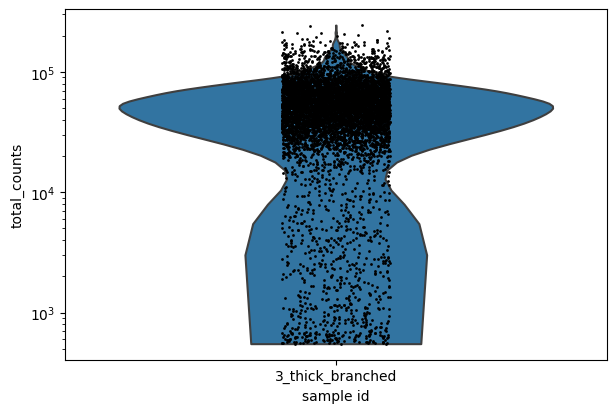

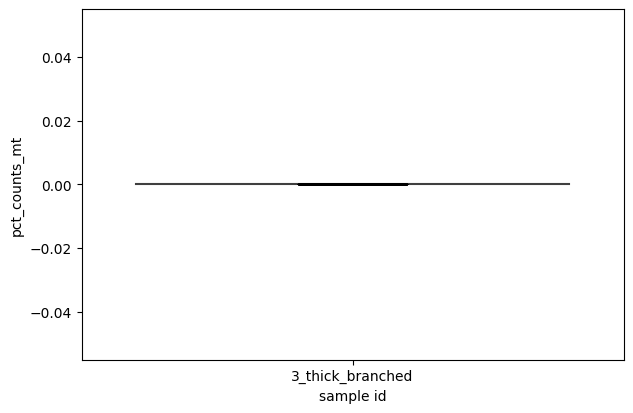

In [20]:
# Quality control - plot QC metrics
# Sample quality plots
m3_t1 = sc.pl.violin(adata_m3, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m3_t2 = sc.pl.violin(adata_m3, 'pct_counts_mt', groupby='sample_id')

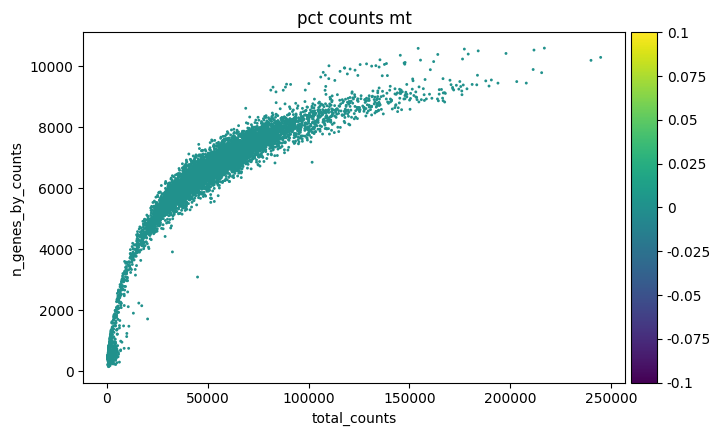

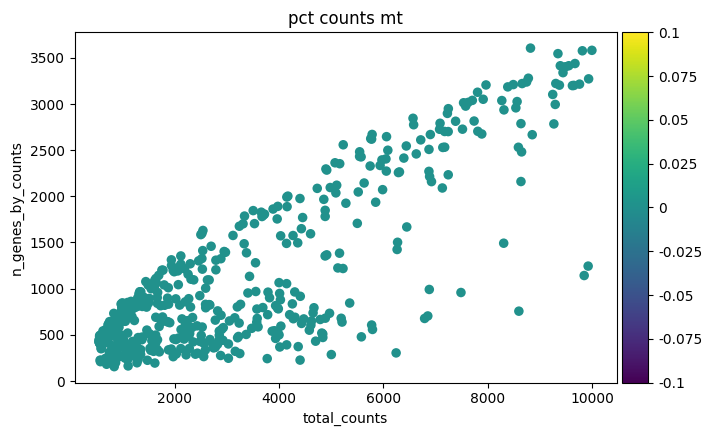

In [21]:
# Data quality summary plots
m3_p1 = sc.pl.scatter(adata_m3, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m3_p2 = sc.pl.scatter(adata_m3[adata_m3.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

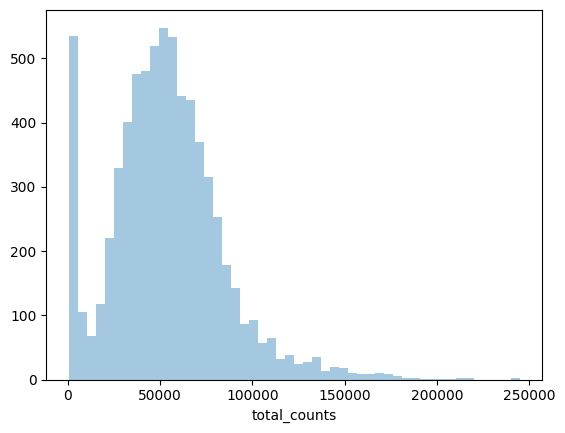

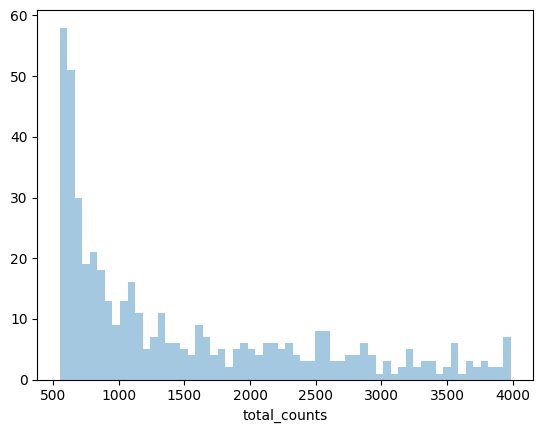

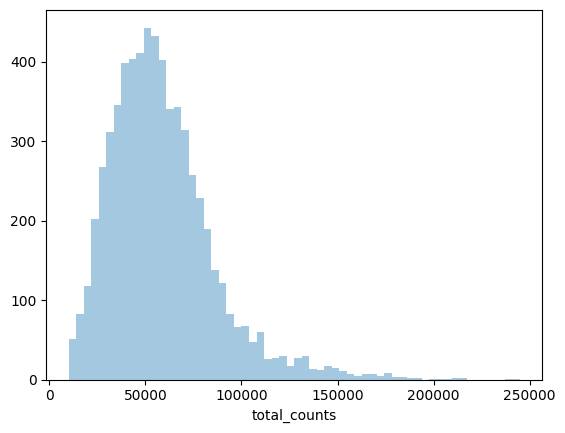

In [22]:
#Thresholding decision: counts
m3_p3 = sb.distplot(adata_m3.obs['total_counts'], kde=False)
plt.show()

m3_p4 = sb.distplot(adata_m3.obs['total_counts'][adata_m3.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

m3_p5 = sb.distplot(adata_m3.obs['total_counts'][adata_m3.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

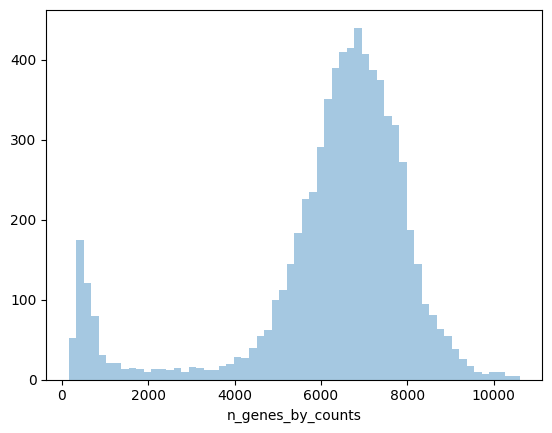

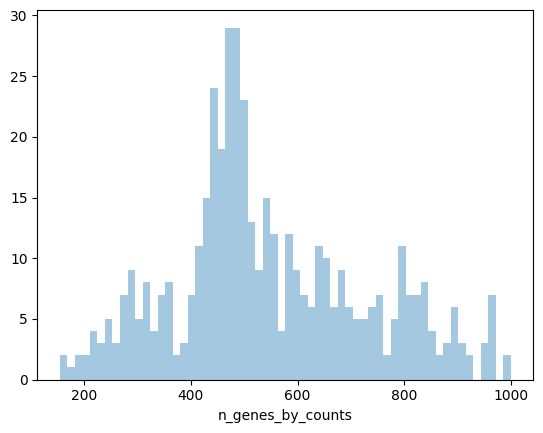

In [23]:
#Thresholding decision: genes
m3_p6 = sb.distplot(adata_m3.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m3_p7 = sb.distplot(adata_m3.obs['n_genes_by_counts'][adata_m3.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()

In [24]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m3.n_obs))

sc.pp.filter_cells(adata_m3, max_counts = 175000)
print('Number of cells after max count filter: {:d}'.format(adata_m3.n_obs))

adata_m3 = adata_m3[adata_m3.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m3.n_obs))

sc.pp.filter_cells(adata_m3, min_genes = 3000)
print('Number of cells after gene filter: {:d}'.format(adata_m3.n_obs))

Total number of cells: 7044
Number of cells after max count filter: 7019
Number of cells after MT filter: 7019
Number of cells after gene filter: 6403


In [25]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m3, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m3.n_vars))

Total number of genes: 22545
Number of genes after cell filter: 14737


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least 20 cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset. 

## cells with more than 175000 counts
## cells with less than 3000 expressed genes
## cells with 20% and more reads aligned to mitochondrial genes
## resulting dataset consists of 6403 cells and 14737 genes

# d) Sample 4_tree-like

In [26]:
# Quality control - calculate QC covariates
adata_m4.var["mt"] = adata_m4.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m4, qc_vars=["mt"], inplace=True)

adata_m4.obs['log_counts'] = np.log(adata_m4.obs['total_counts'])

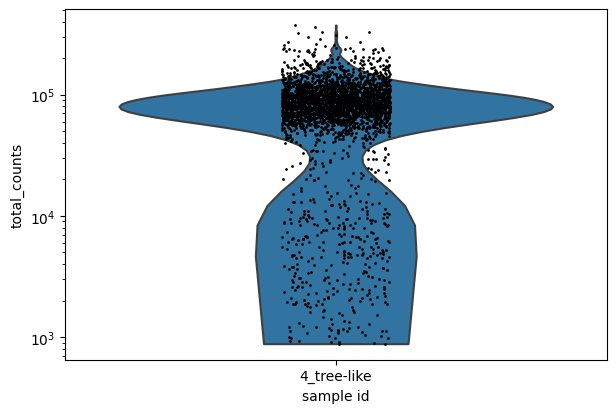

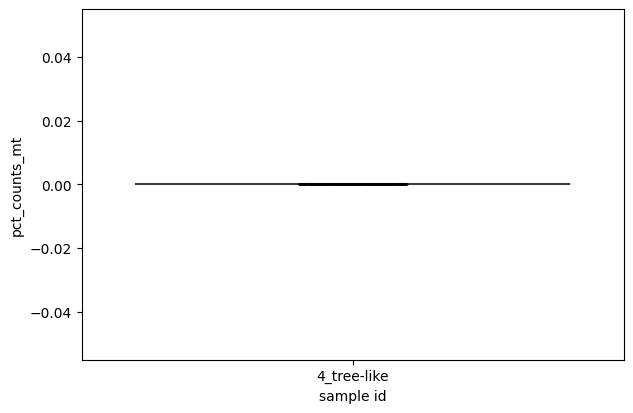

In [27]:
# Quality control - plot QC metrics
# Sample quality plots
m4_t1 = sc.pl.violin(adata_m4, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m4_t2 = sc.pl.violin(adata_m4, 'pct_counts_mt', groupby='sample_id')

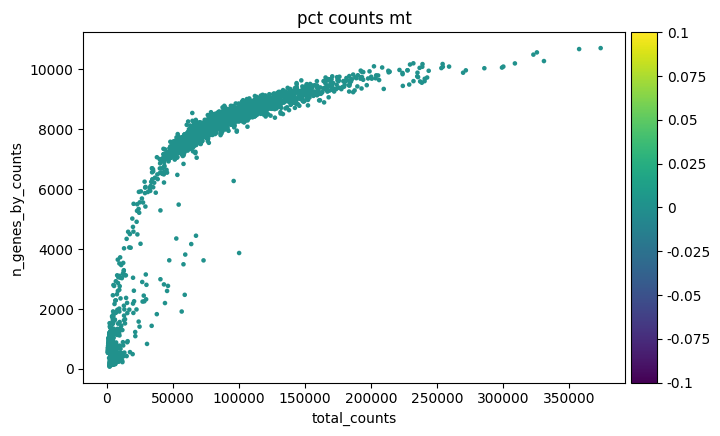

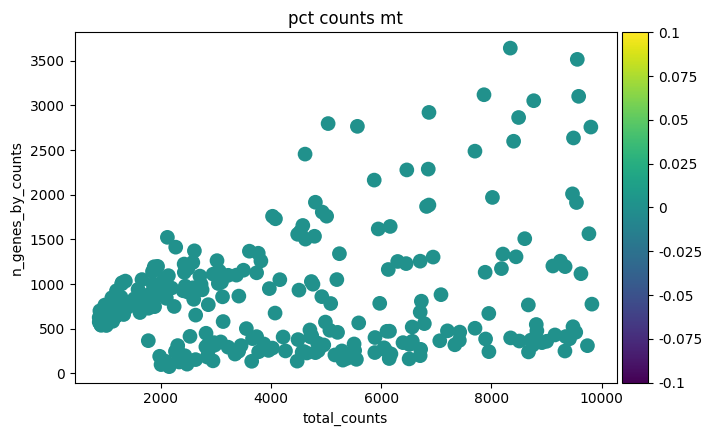

In [28]:
# Data quality summary plots
m4_p1 = sc.pl.scatter(adata_m4, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m4_p2 = sc.pl.scatter(adata_m4[adata_m4.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

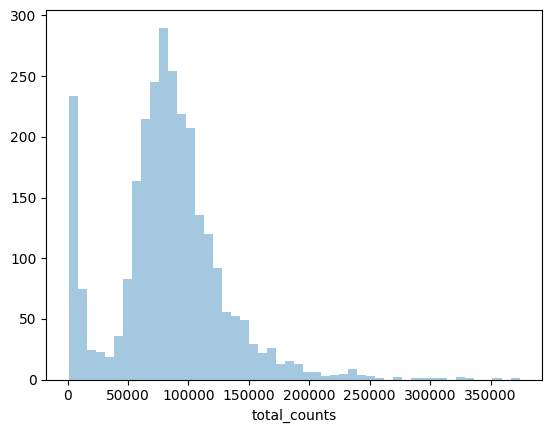

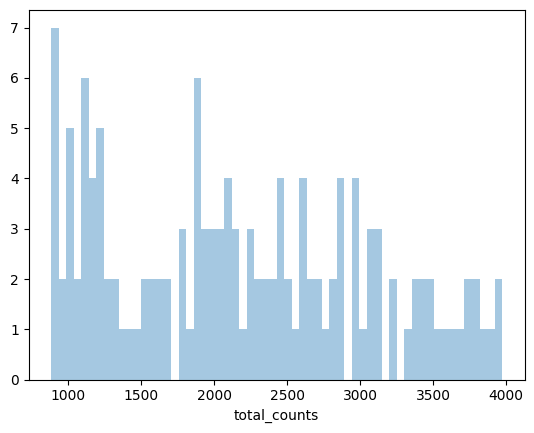

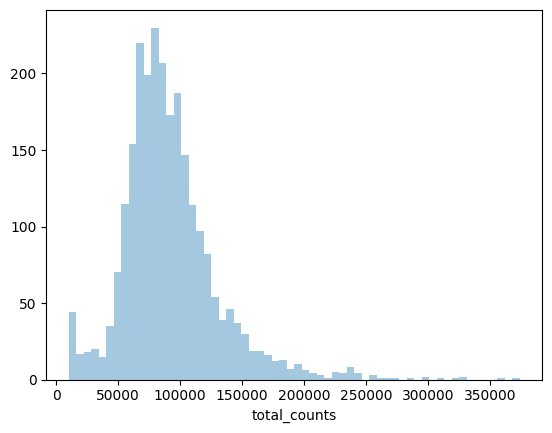

In [29]:
#Thresholding decision: counts
m4_p3 = sb.distplot(adata_m4.obs['total_counts'], kde=False)
plt.show()

m4_p4 = sb.distplot(adata_m4.obs['total_counts'][adata_m4.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

m4_p5 = sb.distplot(adata_m4.obs['total_counts'][adata_m4.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

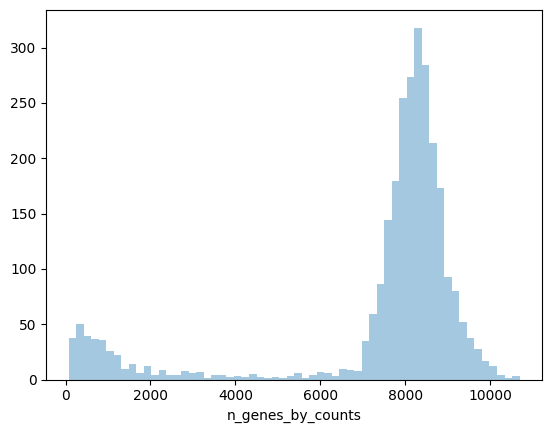

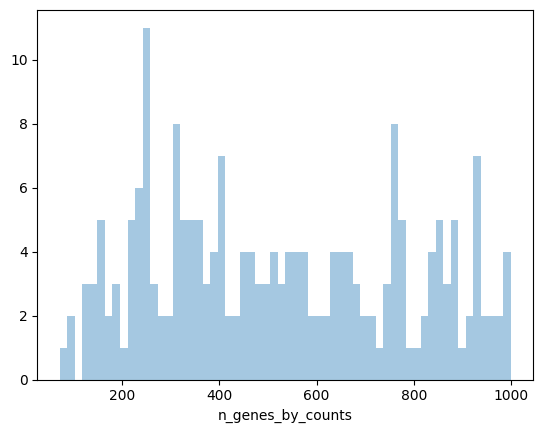

In [30]:
#Thresholding decision: genes
m4_p6 = sb.distplot(adata_m4.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m4_p7 = sb.distplot(adata_m4.obs['n_genes_by_counts'][adata_m4.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()

In [31]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m4.n_obs))

sc.pp.filter_cells(adata_m4, max_counts = 225000)
print('Number of cells after max count filter: {:d}'.format(adata_m4.n_obs))

adata_m4 = adata_m4[adata_m4.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m4.n_obs))

sc.pp.filter_cells(adata_m4, min_genes = 7000)
print('Number of cells after gene filter: {:d}'.format(adata_m4.n_obs))

Total number of cells: 2763
Number of cells after max count filter: 2730
Number of cells after MT filter: 2730
Number of cells after gene filter: 2312


In [32]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m4.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m4, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m4.n_vars))

Total number of genes: 22545
Number of genes after cell filter: 14014


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least 20 cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset. 

## cells with more than 225000 counts
## cells with less than 7000 expressed genes
## cells with 20% and more reads aligned to mitochondrial genes
## resulting dataset consists of 2312 cells and 14014 genes

# e) Sample 5_branched_mesenchymal

In [33]:
##### Quality control - calculate QC covariates
adata_m5.var["mt"] = adata_m5.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m5, qc_vars=["mt"], inplace=True)

adata_m5.obs['log_counts'] = np.log(adata_m5.obs['total_counts'])

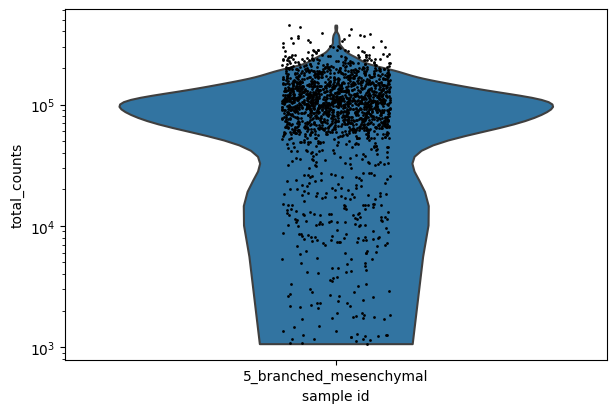

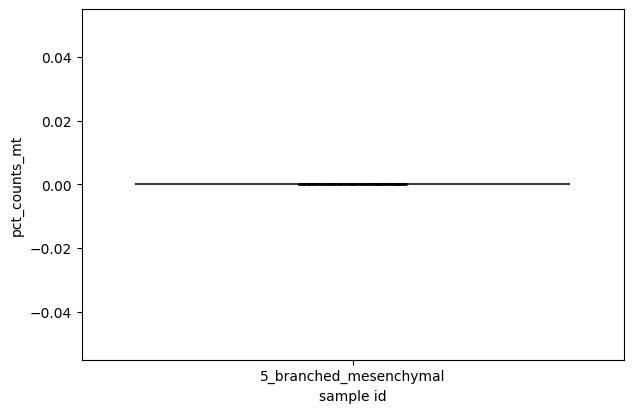

In [34]:
# Quality control - plot QC metrics
# Sample quality plots
m5_t1 = sc.pl.violin(adata_m5, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m5_t2 = sc.pl.violin(adata_m5, 'pct_counts_mt', groupby='sample_id')

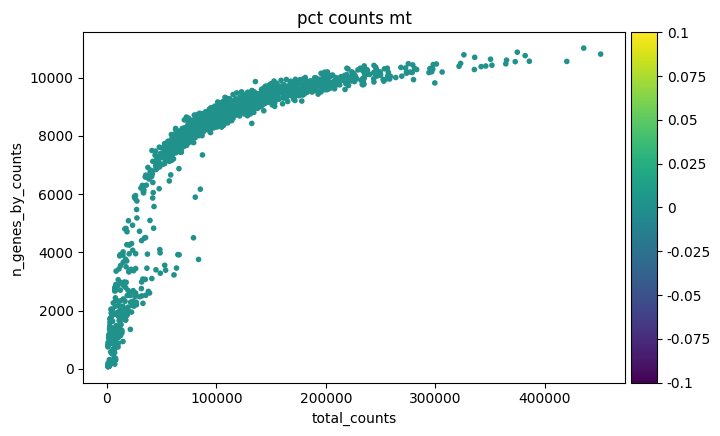

In [35]:
# Data quality summary plots
m5_p1 = sc.pl.scatter(adata_m5, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
# m5_p2 = sc.pl.scatter(adata_m5[adata_m5.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

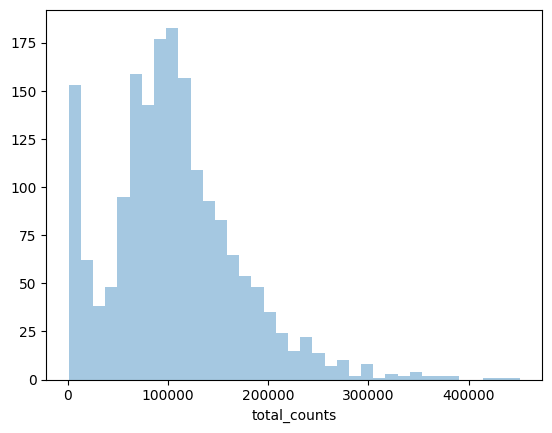

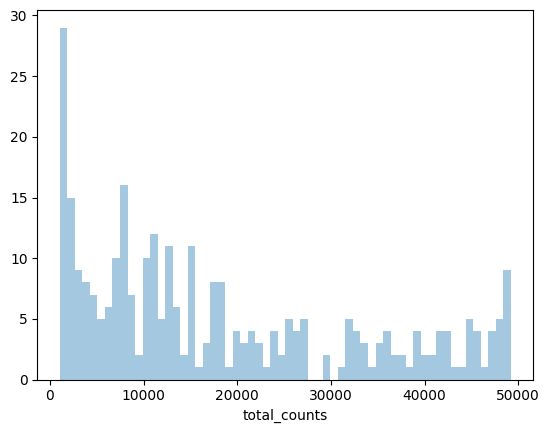

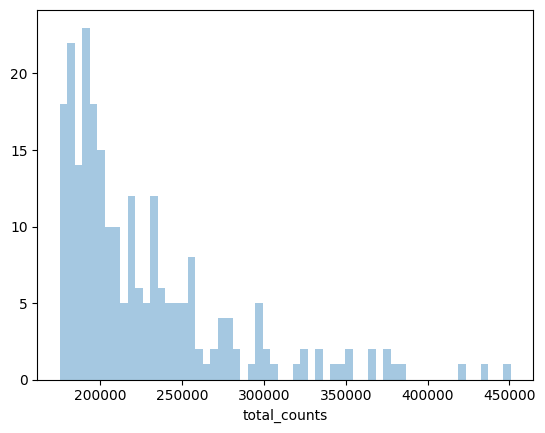

In [36]:
#Thresholding decision: counts
m5_p3 = sb.distplot(adata_m5.obs['total_counts'], kde=False)
plt.show()

m5_p4 = sb.distplot(adata_m5.obs['total_counts'][adata_m5.obs['total_counts']<50000], kde=False, bins=60)
plt.show()

m5_p5 = sb.distplot(adata_m5.obs['total_counts'][adata_m5.obs['total_counts']>175000], kde=False, bins=60)
plt.show()

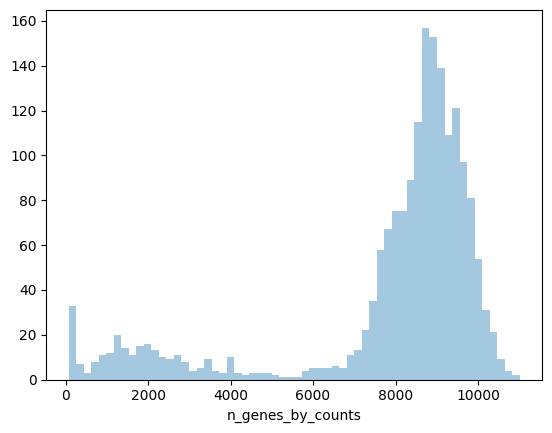

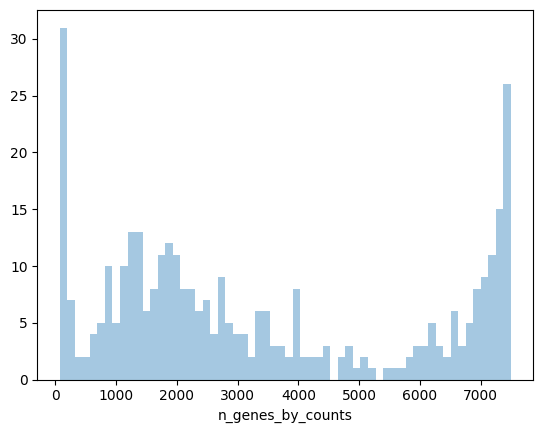

In [37]:
#Thresholding decision: genes
m5_p6 = sb.distplot(adata_m5.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m5_p7 = sb.distplot(adata_m5.obs['n_genes_by_counts'][adata_m5.obs['n_genes_by_counts']<7500], kde=False, bins=60)
plt.show()

In [38]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m5.n_obs))

sc.pp.filter_cells(adata_m5, max_counts = 300000)
print('Number of cells after max count filter: {:d}'.format(adata_m5.n_obs))

adata_m5 = adata_m5[adata_m5.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m5.n_obs))

sc.pp.filter_cells(adata_m5, min_genes = 5500)
print('Number of cells after gene filter: {:d}'.format(adata_m5.n_obs))

Total number of cells: 1823
Number of cells after max count filter: 1803
Number of cells after MT filter: 1803
Number of cells after gene filter: 1549


In [39]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m5.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m5, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m5.n_vars))

Total number of genes: 22545
Number of genes after cell filter: 13987


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least 20 cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset. 

## cells with more than 300000 counts
## cells with less than 5500 expressed genes
## cells with 20% and more reads aligned to mitochondrial genes
## resulting dataset consists of 1549 cells and 13987 genes

# f) Sample 6_firework

In [40]:
# Quality control - calculate QC covariates
adata_m6.var["mt"] = adata_m6.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m6, qc_vars=["mt"], inplace=True)

adata_m6.obs['log_counts'] = np.log(adata_m6.obs['total_counts'])

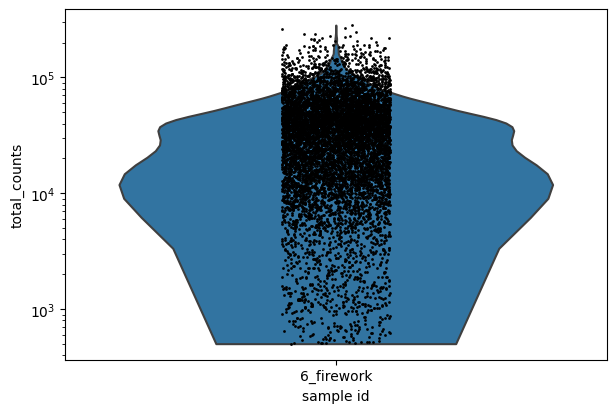

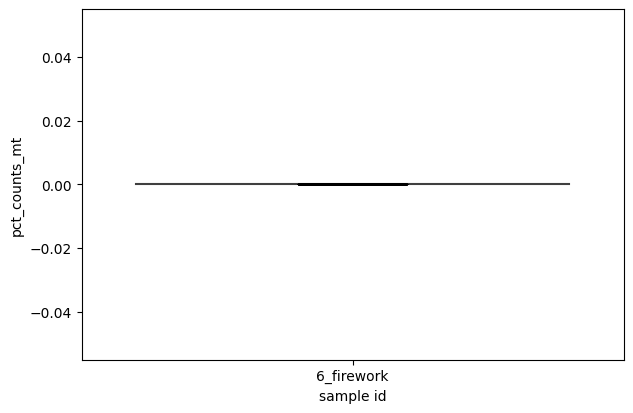

In [41]:
# Quality control - plot QC metrics
# Sample quality plots
m6_t1 = sc.pl.violin(adata_m6, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m6_t2 = sc.pl.violin(adata_m6, 'pct_counts_mt', groupby='sample_id')

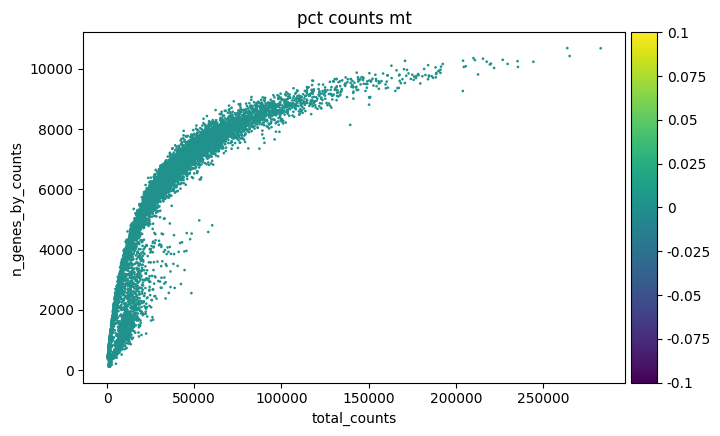

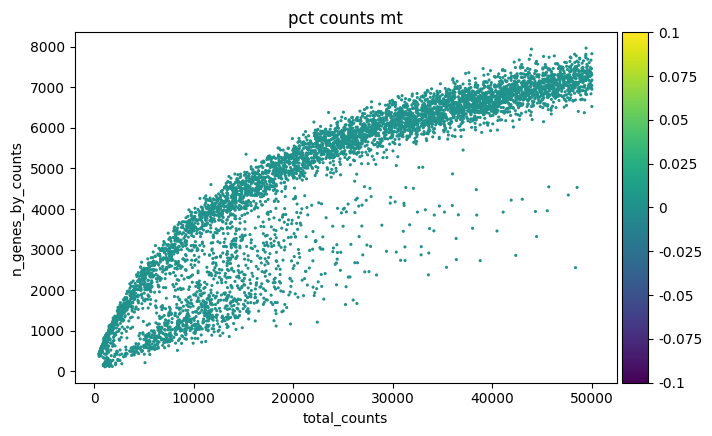

In [42]:
# Data quality summary plots
m6_p1 = sc.pl.scatter(adata_m6, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m6_p2 = sc.pl.scatter(adata_m6[adata_m6.obs['total_counts']<50000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

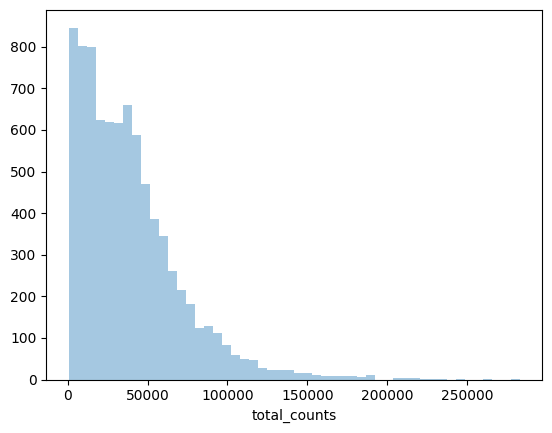

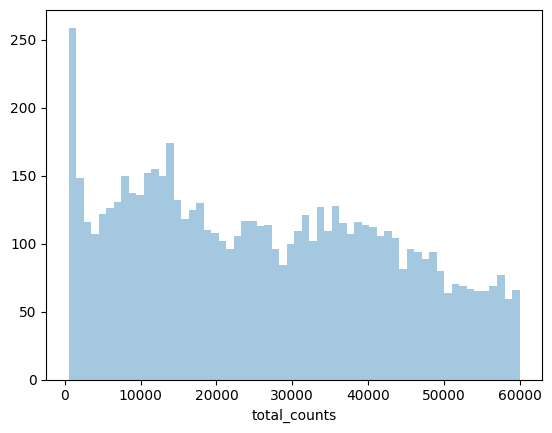

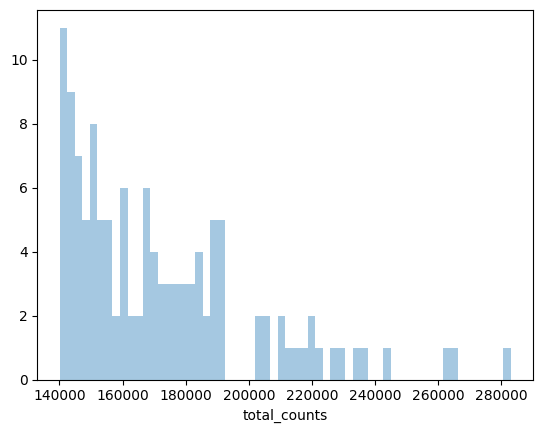

In [43]:
#Thresholding decision: counts
m6_p3 = sb.distplot(adata_m6.obs['total_counts'], kde=False)
plt.show()

m6_p4 = sb.distplot(adata_m6.obs['total_counts'][adata_m6.obs['total_counts']<60000], kde=False, bins=60)
plt.show()

m6_p5 = sb.distplot(adata_m6.obs['total_counts'][adata_m6.obs['total_counts']>140000], kde=False, bins=60)
plt.show()

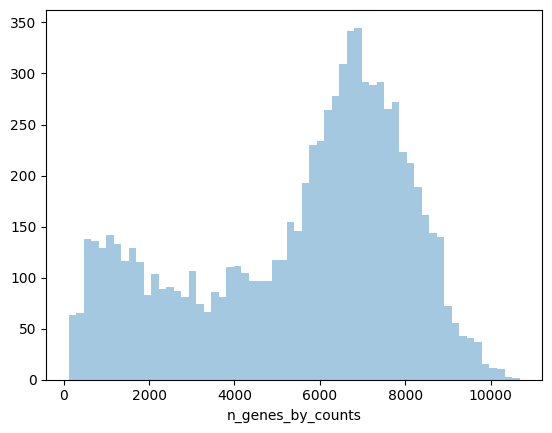

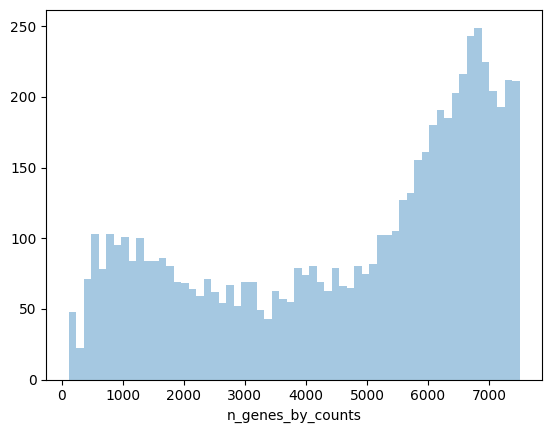

In [44]:
#Thresholding decision: genes
m6_p6 = sb.distplot(adata_m6.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m6_p7 = sb.distplot(adata_m6.obs['n_genes_by_counts'][adata_m6.obs['n_genes_by_counts']<7500], kde=False, bins=60)
plt.show()

In [45]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m6.n_obs))

sc.pp.filter_cells(adata_m6, max_counts = 190000)
print('Number of cells after max count filter: {:d}'.format(adata_m6.n_obs))

adata_m6 = adata_m6[adata_m6.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m6.n_obs))

sc.pp.filter_cells(adata_m6, min_genes = 3500)
print('Number of cells after gene filter: {:d}'.format(adata_m6.n_obs))

Total number of cells: 8226
Number of cells after max count filter: 8201
Number of cells after MT filter: 8201
Number of cells after gene filter: 6235


In [46]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m6.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m6, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m6.n_vars))

Total number of genes: 22545
Number of genes after cell filter: 14967


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least 20 cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset. 

## cells with more than 190000 counts
## cells with less than 3500 expressed genes
## cells with 20% and more reads aligned to mitochondrial genes
## resulting dataset consists of 6235 cells and 14967 genes

# g) Sample 7_star-like

In [47]:
# Quality control - calculate QC covariates
adata_m7.var["mt"] = adata_m7.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m7, qc_vars=["mt"], inplace=True)

adata_m7.obs['log_counts'] = np.log(adata_m7.obs['total_counts'])

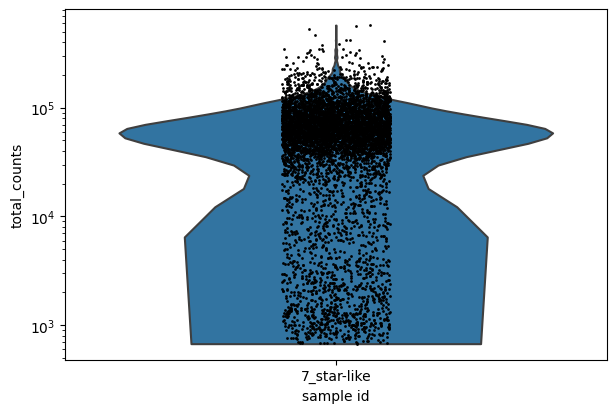

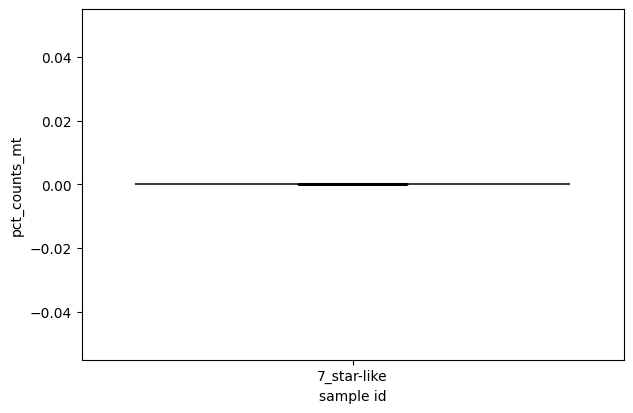

In [48]:
# Quality control - plot QC metrics
# Sample quality plots
m7_t1 = sc.pl.violin(adata_m7, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m7_t2 = sc.pl.violin(adata_m7, 'pct_counts_mt', groupby='sample_id')

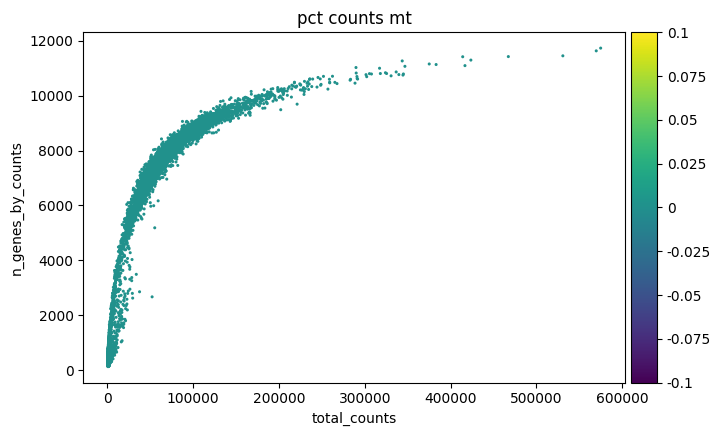

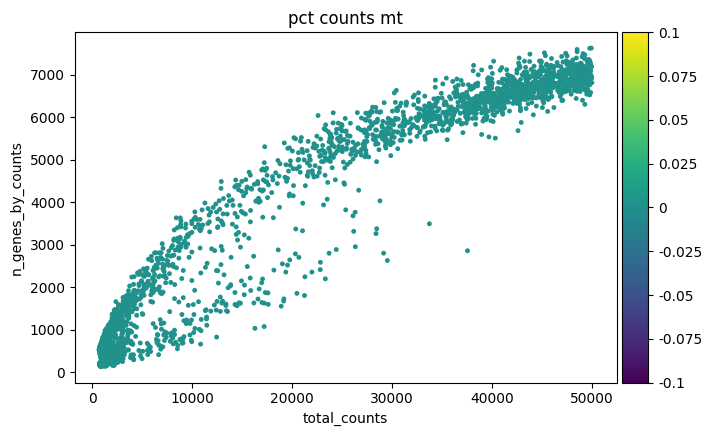

In [49]:
# Data quality summary plots
m7_p1 = sc.pl.scatter(adata_m7, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m7_p2 = sc.pl.scatter(adata_m7[adata_m7.obs['total_counts']<50000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

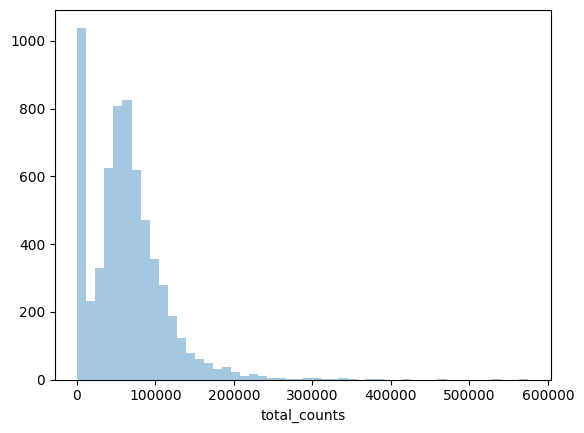

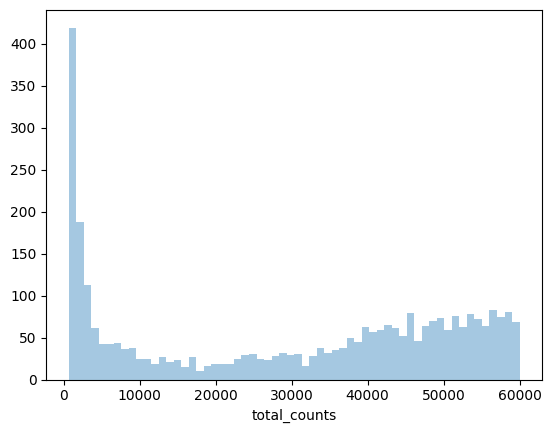

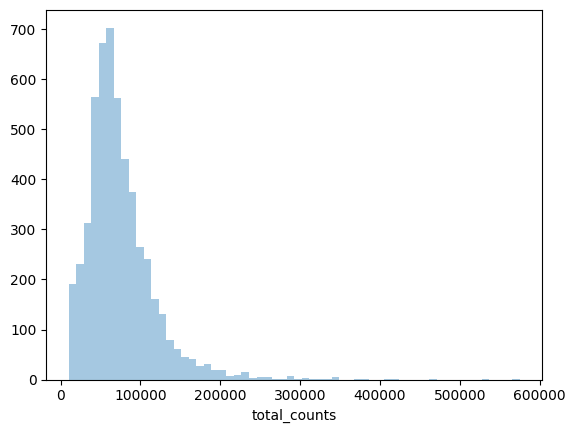

In [50]:
#Thresholding decision: counts
m7_p3 = sb.distplot(adata_m7.obs['total_counts'], kde=False)
plt.show()

m7_p4 = sb.distplot(adata_m7.obs['total_counts'][adata_m7.obs['total_counts']<60000], kde=False, bins=60)
plt.show()

m7_p5 = sb.distplot(adata_m7.obs['total_counts'][adata_m7.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

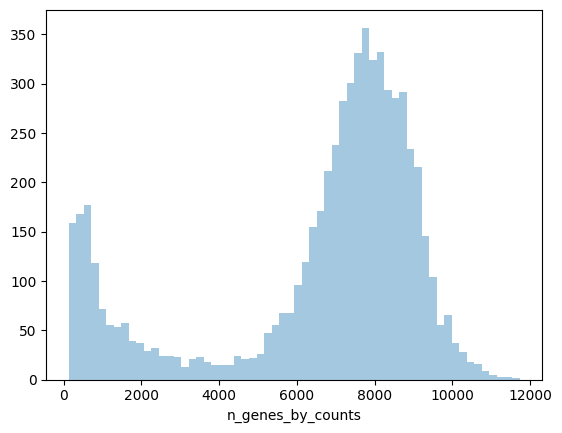

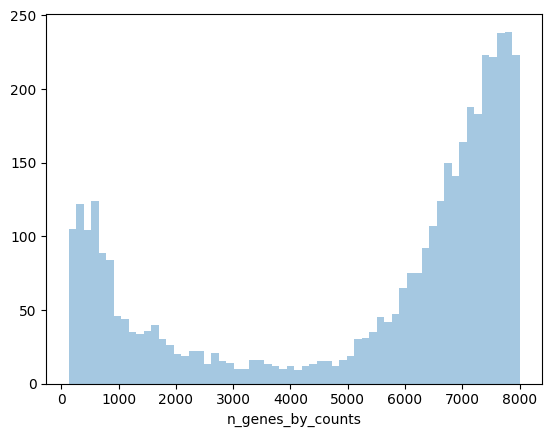

In [51]:
#Thresholding decision: genes
m7_p6 = sb.distplot(adata_m7.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m7_p7 = sb.distplot(adata_m7.obs['n_genes_by_counts'][adata_m7.obs['n_genes_by_counts']<8000], kde=False, bins=60)
plt.show()

In [52]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m7.n_obs))

sc.pp.filter_cells(adata_m7, max_counts = 250000)
print('Number of cells after max count filter: {:d}'.format(adata_m7.n_obs))

adata_m7 = adata_m7[adata_m7.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m7.n_obs))

sc.pp.filter_cells(adata_m7, min_genes = 3000)
print('Number of cells after gene filter: {:d}'.format(adata_m7.n_obs))

Total number of cells: 6251
Number of cells after max count filter: 6211
Number of cells after MT filter: 6211
Number of cells after gene filter: 5148


In [53]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m7.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m7, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m7.n_vars))

Total number of genes: 22545
Number of genes after cell filter: 15218


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least 20 cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset. 

## cells with more than 250000 counts
## cells with less than 6211 expressed genes
## cells with 20% and more reads aligned to mitochondrial genes
## resulting dataset consists of 5148 cells and 15218 genes

# Concatenation
Now we have (1) QC performed on concatenated samples, and (2) QC on samples to be concatenated. Let's compare them. 

In [54]:
adata2 = adata_m1.concatenate(adata_m2, batch_key='sample_nr').concatenate(adata_m3, batch_key='sample_nr').concatenate(adata_m4, batch_key='sample_nr').concatenate(adata_m5, batch_key='sample_nr').concatenate(adata_m6, batch_key='sample_nr').concatenate(adata_m7, batch_key='sample_nr')  # what we've done above without prior QC

### ADATA 2

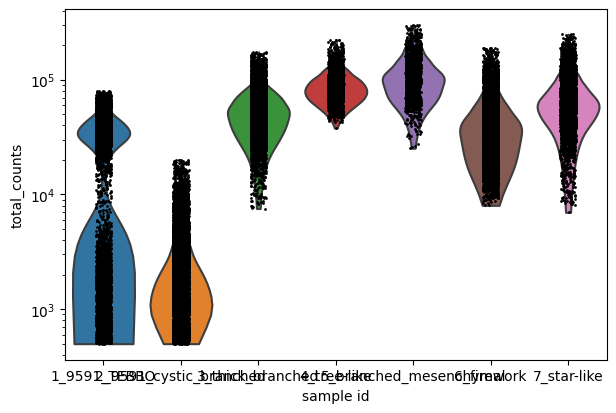

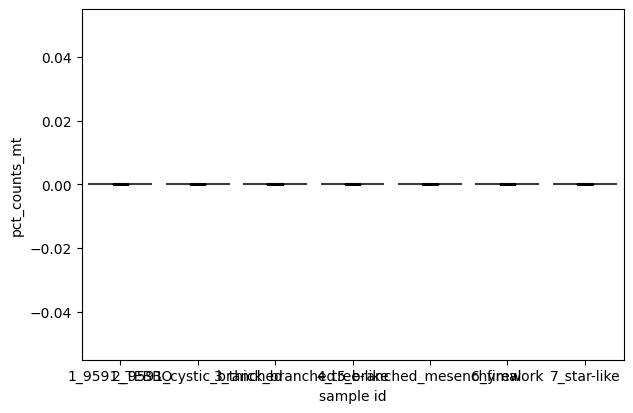

In [55]:
# Quality control - plot QC metrics
# Sample quality plots
m4_t1 = sc.pl.violin(adata2, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m4_t2 = sc.pl.violin(adata2, 'pct_counts_mt', groupby='sample_id')

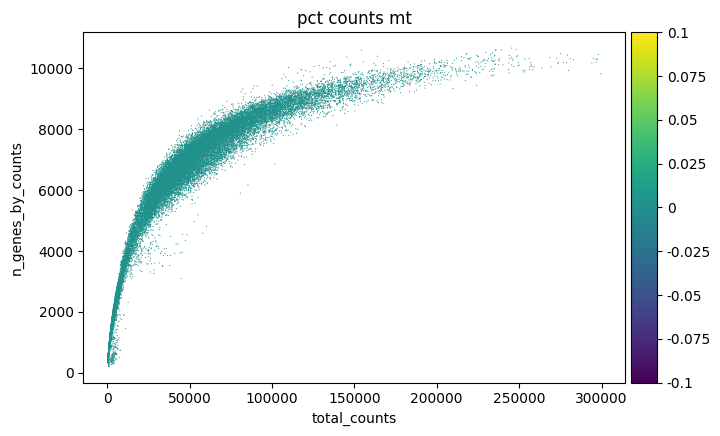

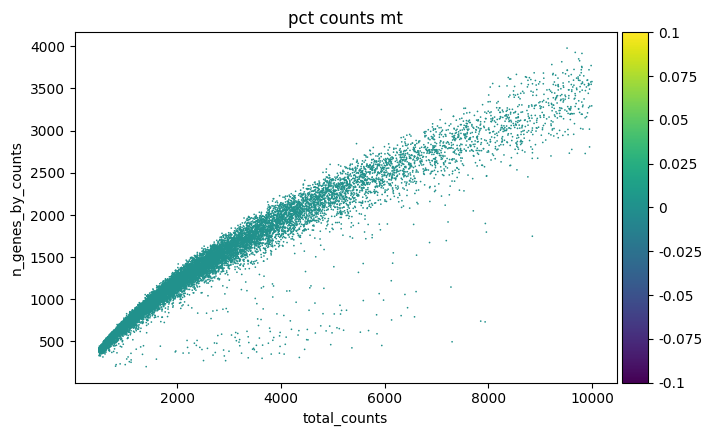

In [56]:
# Data quality summary plots
m4_p1 = sc.pl.scatter(adata2, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m4_p2 = sc.pl.scatter(adata2[adata2.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

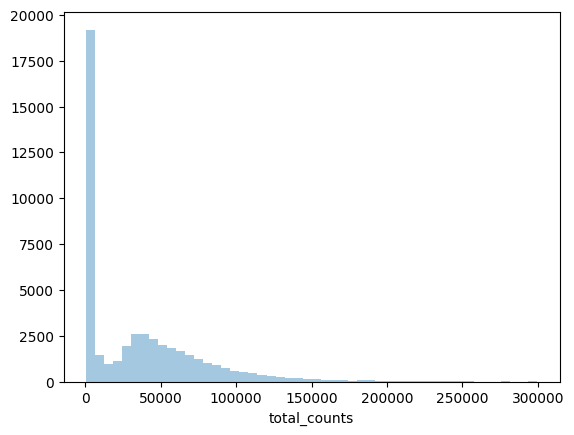

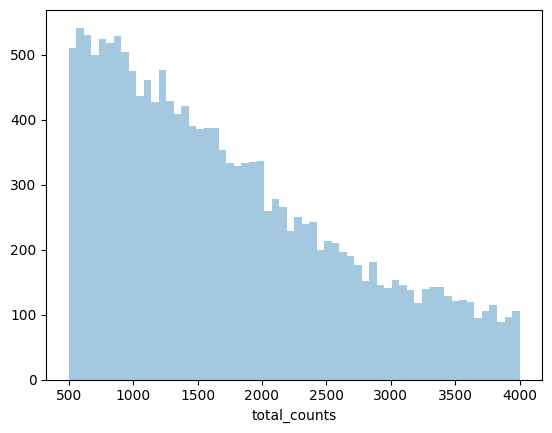

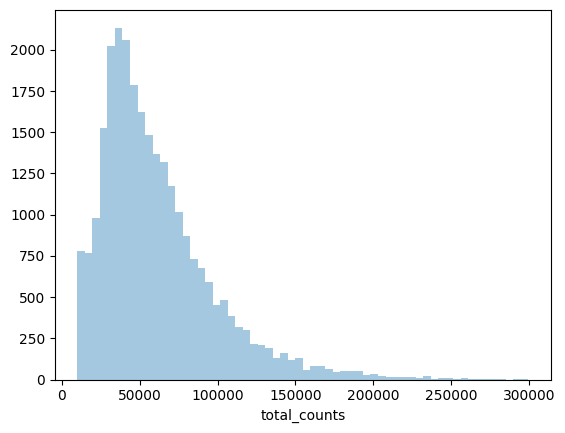

In [57]:
# Thresholding decision: counts
final_p3 = sb.distplot(adata2.obs['total_counts'], kde=False)
plt.show()

final_p4 = sb.distplot(adata2.obs['total_counts'][adata2.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

final_p5 = sb.distplot(adata2.obs['total_counts'][adata2.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

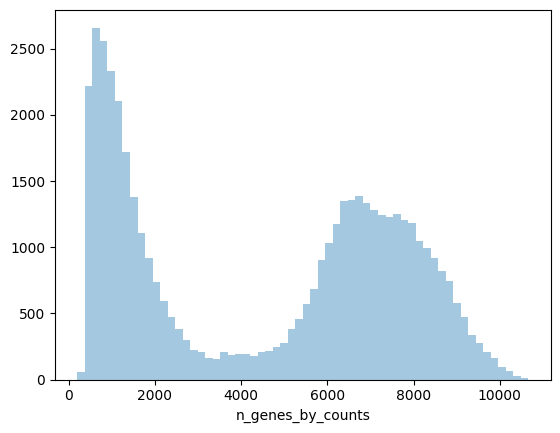

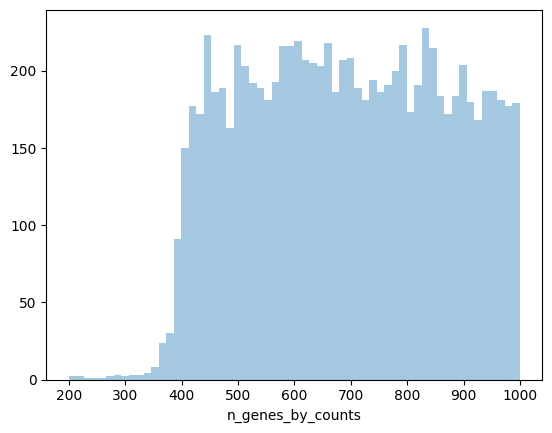

In [58]:
# Thresholding decision: genes
final_p6 = sb.distplot(adata2.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

final_p6 = sb.distplot(adata2.obs['n_genes_by_counts'][adata2.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()


### RESULT QC

In [61]:
adata2.X

<46967x11939 sparse matrix of type '<class 'numpy.float32'>'
	with 207721221 stored elements in Compressed Sparse Row format>

In [59]:
adata2.write_h5ad('../data/adata/rev_QC_adata.h5ad')